Analyses properties of decorrelation and whitening methods for decorrelated networks

In [27]:
import numpy as np
import torch
import torch.nn as nn
from decorrelation.decorrelation import Decorrelation, DecorLinear, DecorConv2d
import matplotlib.pyplot as plt
import matplotlib
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
from decorrelation.utils import decor_train
import argparse
from decorrelation.plotting import *

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Grayscale(1),
        transforms.Normalize((0.5), (0.5)),
        # torch.flatten # not necessary but useful for debugging
        ])

train_data = MNIST(root='~/Data', train=True, download=True, transform=transform)
train_data = Subset(train_data, np.random.permutation(len(train_data.data))[:1000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

epoch 0  	time:0.000 s	bp loss: 2.473516	decorrelation loss: 7.550481	test loss: 0.000000
epoch 1  	time:0.655 s	bp loss: 2.473282	decorrelation loss: 50.720466	test loss: 0.000000
epoch 2  	time:0.646 s	bp loss: 2.467220	decorrelation loss: 1519.084500	test loss: 0.000000
epoch 3  	time:0.648 s	bp loss: 2.421450	decorrelation loss: 1706.753952	test loss: 0.000000
epoch 4  	time:0.636 s	bp loss: 2.057905	decorrelation loss: 71313.386979	test loss: 0.000000
epoch 5  	time:0.647 s	bp loss: 1.742035	decorrelation loss: 149580.416440	test loss: 0.000000
epoch 6  	time:0.648 s	bp loss: 1.520459	decorrelation loss: 498704.962489	test loss: 0.000000
epoch 7  	time:0.643 s	bp loss: 1.417779	decorrelation loss: 505062.494412	test loss: 0.000000
epoch 8  	time:0.625 s	bp loss: 1.320832	decorrelation loss: 1177111.163648	test loss: 0.000000
epoch 9  	time:0.620 s	bp loss: 1.291198	decorrelation loss: 976252.750931	test loss: 0.000000
epoch 10 	time:0.620 s	bp loss: 1.238957	decorrelation loss: 82

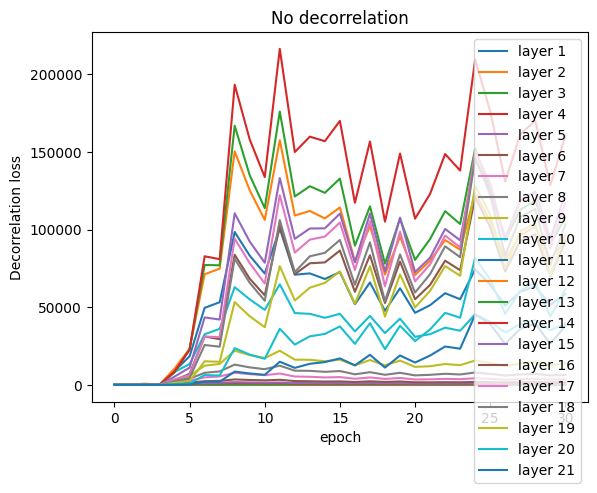

In [3]:
class Model(nn.Sequential):
    def __init__(self, in_features, num_hidden, num_hidden_layers, args):
        layers = [DecorLinear(in_features, num_hidden, decor_lr=args.decor_lr, kappa=args.kappa)]
        for _ in range(num_hidden_layers-1):
            layers.append(DecorLinear(num_hidden, num_hidden, decor_lr=args.decor_lr, kappa=args.kappa))
        layers.append(DecorLinear(num_hidden, 10, decor_lr=args.decor_lr, kappa=args.kappa))

        super().__init__(*layers)

    def forward(self, x):
        return super().forward(x.view(len(x), -1))
    

lossfun = torch.nn.CrossEntropyLoss().to(device)

args = argparse.Namespace(lr=1e-3, decor_lr=0, kappa=1e-2, epochs=30)
model = Model(784, num_hidden=20, num_hidden_layers=20, args=args).to(device)
model, train_loss, test_loss, D, T  = decor_train(args, model, lossfun, train_loader, device=device)

plt.subplot(1,2,1)
plt.plot(D)
plt.legend([f'layer {i}' for i in range(1, len(D)+1)])
plt.title('Decorrelation')
plt.xlabel('epoch')
plt.ylabel('Decorrelation loss');
plt.subplot(1,2,1)
plt.plot(train_loss)
plt.title('BP')
plt.xlabel('epoch')
plt.ylabel('BP loss');

epoch 0  	time:0.000 s	bp loss: 2.473516	decorrelation loss: 7.494748	test loss: 0.000000
epoch 1  	time:0.665 s	bp loss: 2.473596	decorrelation loss: 0.806217	test loss: 0.000000
epoch 2  	time:0.662 s	bp loss: 2.468504	decorrelation loss: 0.233770	test loss: 0.000000
epoch 3  	time:0.638 s	bp loss: 2.459113	decorrelation loss: 0.216687	test loss: 0.000000
epoch 4  	time:0.640 s	bp loss: 2.395949	decorrelation loss: 0.272259	test loss: 0.000000
epoch 5  	time:0.636 s	bp loss: 2.324888	decorrelation loss: 0.287161	test loss: 0.000000
epoch 6  	time:0.637 s	bp loss: 2.308027	decorrelation loss: 0.250042	test loss: 0.000000
epoch 7  	time:0.637 s	bp loss: 2.270611	decorrelation loss: 0.266990	test loss: 0.000000
epoch 8  	time:0.638 s	bp loss: 2.218992	decorrelation loss: 0.336865	test loss: 0.000000
epoch 9  	time:0.641 s	bp loss: 2.211245	decorrelation loss: 0.271509	test loss: 0.000000
epoch 10 	time:0.638 s	bp loss: 2.202882	decorrelation loss: 0.292665	test loss: 0.000000
epoch 11 	

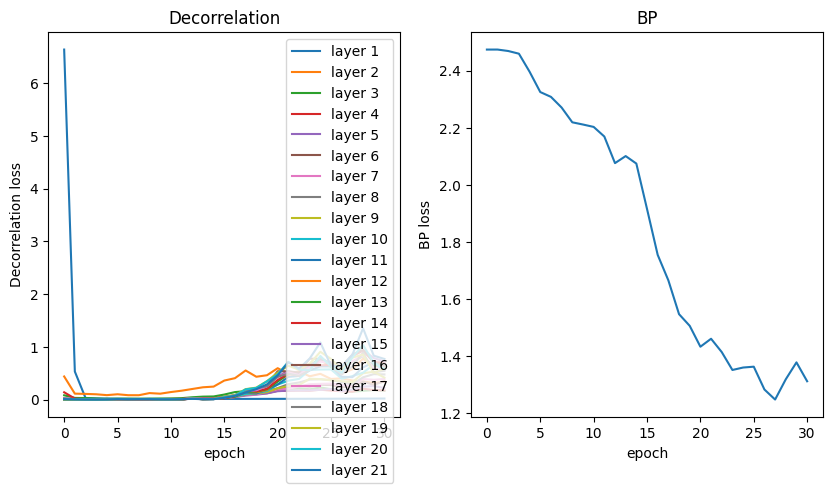

In [28]:
args = argparse.Namespace(lr=1e-3, decor_lr=1e0, kappa=1e-3, epochs=30)
model = Model(784, num_hidden=20, num_hidden_layers=20, args=args).to(device)
model, train_loss, test_loss, D, T  = decor_train(args, model, lossfun, train_loader, device=device)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(D)
plt.legend([f'layer {i}' for i in range(1, len(D)+1)])
plt.title('Decorrelation')
plt.xlabel('epoch')
plt.ylabel('Decorrelation loss');
plt.subplot(1,2,2)
plt.plot(train_loss)
plt.title('BP')
plt.xlabel('epoch')
plt.ylabel('BP loss');
